# Principal Component Analysis

- Principal components analysis (PCA) is a popular approach for deriving a low-dimensional set of features from a large set of variables.
- PCA is a technique for reducing the dimension of a n × p data matrix X. The first principal component direction of the data is that along which the observations vary the most
- When faced with a large set of correlated variables, principal components allow us to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


## PCA with Scikit-Learn

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

In [3]:
print(PCA.__doc__)

Principal component analysis (PCA).

    Linear dimensionality reduction using Singular Value Decomposition of the
    data to project it to a lower dimensional space. The input data is centered
    but not scaled for each feature before applying the SVD.

    It uses the LAPACK implementation of the full SVD or a randomized truncated
    SVD by the method of Halko et al. 2009, depending on the shape of the input
    data and the number of components to extract.

    It can also use the scipy.sparse.linalg ARPACK implementation of the
    truncated SVD.

    Notice that this class does not support sparse input. See
    :class:`TruncatedSVD` for an alternative with sparse data.

    Read more in the :ref:`User Guide <PCA>`.

    Parameters
    ----------
    n_components : int, float, None or str
        Number of components to keep.
        if n_components is not set all components are kept::

            n_components == min(n_samples, n_features)

        If ``n_components == 'mle'`` 

In [19]:
dataset = load_breast_cancer()
df = pd.DataFrame(data = dataset.data,columns=dataset.feature_names)
df['Target'] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

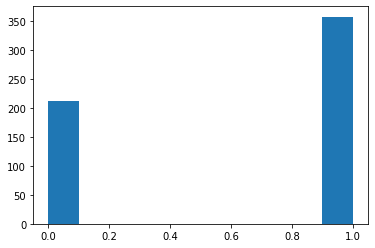

In [21]:
plt.hist(df["Target"])
plt.show()